# Effective Data Visualization Practices

This guide is designed to help you master the art of data visualization, a key skill in any data-driven field. We'll explore common pitfalls, best practices, and the subtle art of balancing aesthetics with functionality

Before jumping into any visualizations, make sure your data is cleaned and formatted appropriately. Even the most beautiful and insightful graphs can be hindered by messy data. For example, inaccuracies, inconsistencies, and missing values can distort your message and lead to incorrect conclusions.

In [1]:
# let's start off by importing the libraries we will need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# all of the graphs in this guide are matplotlib visualizations, but packages like seaborn and plotly usually have the same capabilities
import seaborn as sns
import plotly.express as px

The dataset we will be using in this tutorial is from Analyze Boston. Analyze Boston is the City of Boston’s data hub and is a great resource for data sets regarding the city.

We will be working with a dataset of 2023 (to date) crime incident reports. For each crime, the dataset contains information like a description of the offense, the date and time of the incident, the location, and the district where the incident occurred.

[Link to dataset](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system)

In [2]:
df = pd.read_csv('crimes.csv')
df.head()

/var/folders/0d/2j4lrtfj0ld0ccg61mnxrymw0000gn/T/ipykernel_83918/2167660074.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crimes.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,232000005,1831,NaN,SICK ASSIST,NaN,,0,2023-01-01 00:22:00+00,2023,1,Sunday,0,NaN,JERSEY STREET & VAN NESS STREET\nBOSTON MA 02...,NaN,NaN,NaN
1,232007915,1001,NaN,FORGERY / COUNTERFEITING,C6,200,0,2023-01-02 09:00:00+00,2023,1,Monday,9,NaN,W BROADWAY,42.341287,-71.054680,"(42.34128702104515, -71.05467980204799)"
2,232017539,619,NaN,LARCENY ALL OTHERS,B3,465,0,2023-01-05 17:00:00+00,2023,1,Thursday,17,NaN,BLUE HILL AVENUE,NaN,NaN,NaN
3,232001625,3115,NaN,INVESTIGATE PERSON,B2,,0,2023-01-07 07:57:00+00,2023,1,Saturday,7,NaN,WASHINGTON ST,42.306492,-71.081807,"(42.306492386043296, -71.08180738256408)"
4,232001670,614,NaN,LARCENY THEFT FROM MV - NON-ACCESSORY,C11,253,0,2023-01-07 13:10:00+00,2023,1,Saturday,13,NaN,ELM ST,42.299999,-71.053837,"(42.299998646096654, -71.05383689623031)"


In [8]:
print(f"We have {df.shape[0]} rows in our dataset")

We have 66938 rows in our dataset


## Data Cleaning

In [15]:
# check for null values
round(df.isna().sum() / df.shape[0] * 100, 2)

INCIDENT_NUMBER          0.00
OFFENSE_CODE             0.00
OFFENSE_CODE_GROUP     100.00
OFFENSE_DESCRIPTION      0.00
DISTRICT                 0.25
REPORTING_AREA           0.00
SHOOTING                 0.00
OCCURRED_ON_DATE         0.00
YEAR                     0.00
MONTH                    0.00
DAY_OF_WEEK              0.00
HOUR                     0.00
UCR_PART               100.00
STREET                   0.00
Lat                      7.75
Long                     7.75
Location                 7.75
dtype: float64

In [16]:
# drop OFFENSE_CODE_GROUP and UCR_PART columns since they are 100% null values, along with Lat, Long, and Location columns since we won't be needing them
df.drop(['OFFENSE_CODE_GROUP', 'UCR_PART', 'Lat', 'Long', 'Location'], axis=1, inplace=True)

# then dropna to remove any final null values
df.dropna(inplace=True)

In [19]:
# no duplicates
df.duplicated().sum()

0

In [24]:
# make our date column to be of type datetime
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66768 entries, 1 to 66937
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   INCIDENT_NUMBER      66768 non-null  object             
 1   OFFENSE_CODE         66768 non-null  int64              
 2   OFFENSE_DESCRIPTION  66768 non-null  object             
 3   DISTRICT             66768 non-null  object             
 4   REPORTING_AREA       66768 non-null  object             
 5   SHOOTING             66768 non-null  int64              
 6   OCCURRED_ON_DATE     66768 non-null  datetime64[ns, UTC]
 7   YEAR                 66768 non-null  int64              
 8   MONTH                66768 non-null  int64              
 9   DAY_OF_WEEK          66768 non-null  object             
 10  HOUR                 66768 non-null  int64              
 11  STREET               66768 non-null  object             
dtypes: datetime64[ns, UTC](

# Good vs Bad visualization practices


Now lets get into some examples. In this section, you will see some examples of good and bad visualizations. The goal is to get you thinking about what makes a good visualization and what makes a bad visualization.

## 1. Labeling your graph

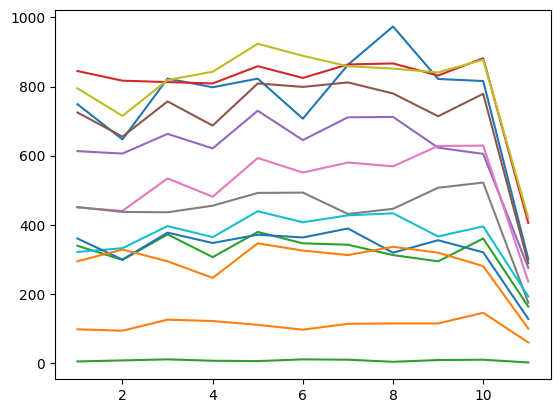

In [6]:
# Bad Practice, no clue what axes/lines mean
crime_trends = df.groupby([df['OCCURRED_ON_DATE'].dt.month, 'DISTRICT'])['INCIDENT_NUMBER'].count().unstack()

for district in crime_trends.columns:
    plt.plot(crime_trends.index, crime_trends[district], label=district)

In the example above, the graph is missing a title, axis labels, and a legend. This makes it difficult to understand what the graph is trying to convey. The graph is also missing a legend, which makes it difficult to understand what the colors represent.

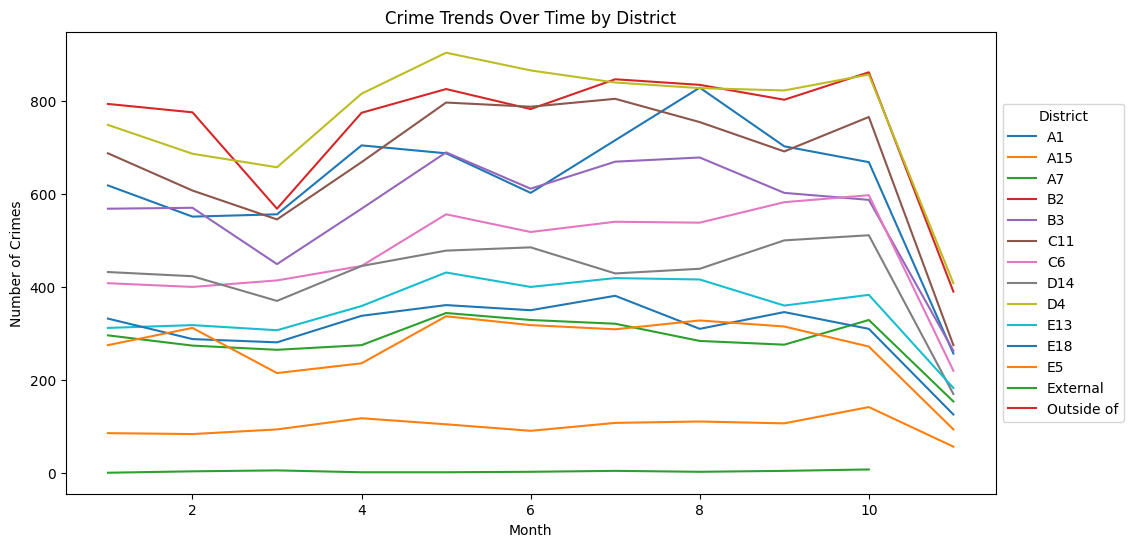

In [136]:
# Good Practice, label!
crime_trends = df.groupby([df['OCCURRED_ON_DATE'].dt.month, 'DISTRICT'])['INCIDENT_NUMBER'].count().unstack()

# makes the graph bigger, easier to read
plt.figure(figsize=(12, 6))
for district in crime_trends.columns:
    plt.plot(crime_trends.index, crime_trends[district], label=district)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crime Trends Over Time by District')
plt.legend(title='District', loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

Here, we have added a title, axis labels, and a legend. This makes it much easier to understand that the graph is showing the number of crimes per district, over the course of the year. The legend also makes it clear that each color represents a different district.

## 2. De-cluttering your visualizations


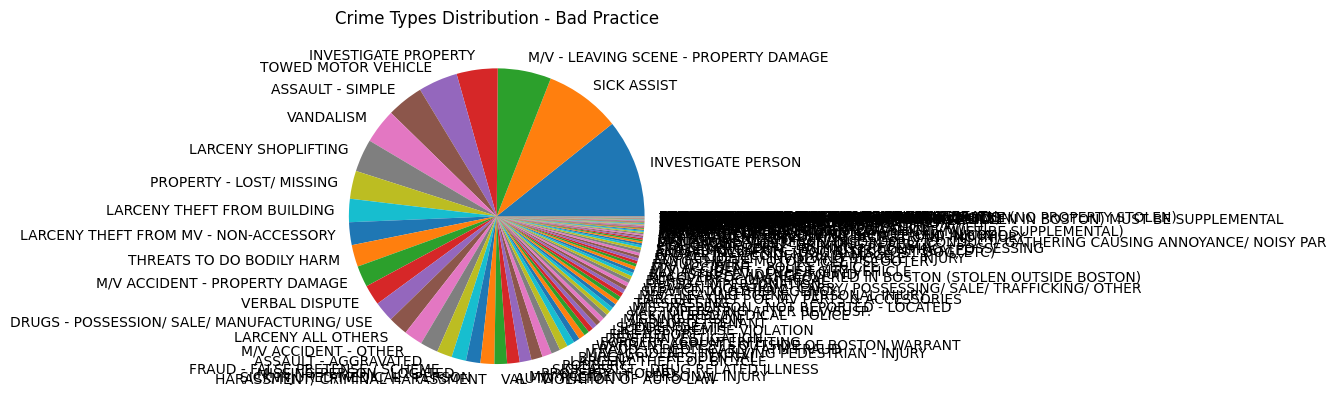

In [26]:
# Bad Practice: unreadable pie chart
crime_counts = df['OFFENSE_DESCRIPTION'].value_counts()
plt.pie(crime_counts, labels = crime_counts.index)
plt.title('Crime Types Distribution - Bad Practice')
plt.show()


Above we have a pie chart that is difficult to read. The labels are overlapping, the colors are not easily distinguishable and the percentages are not visible.

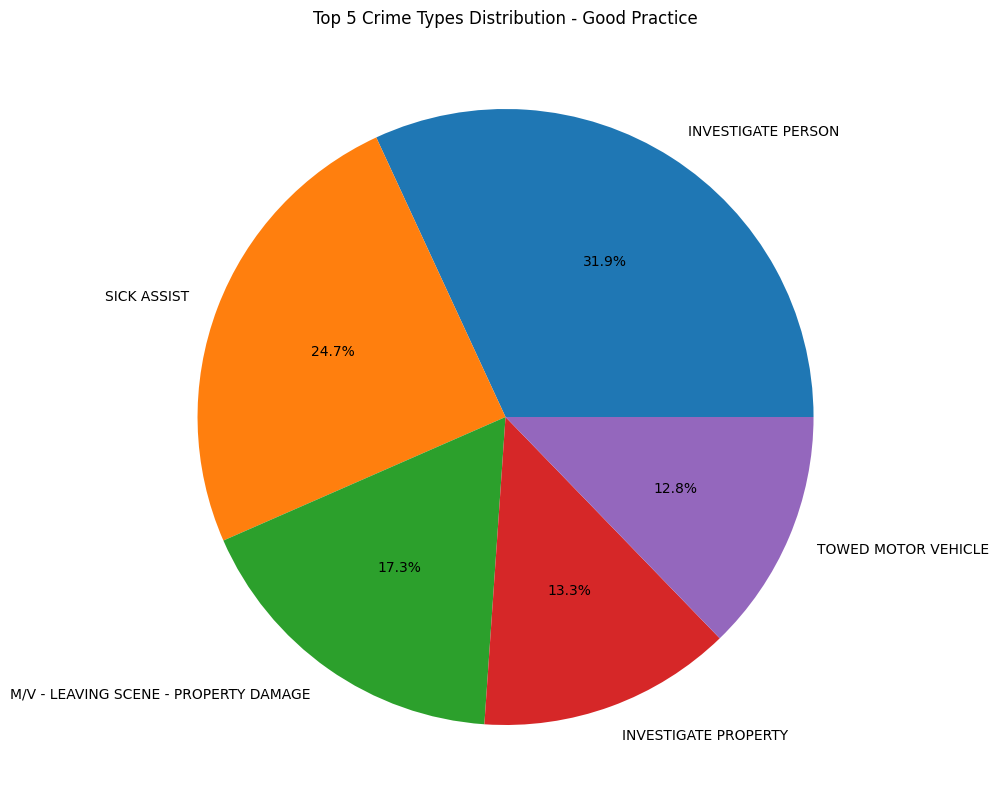

In [27]:
# Better Practice: only focus on top x, and add % label
top_crimes = crime_counts.head(5)
plt.figure(figsize=(10, 10))
plt.pie(top_crimes, labels = top_crimes.index, autopct='%1.1f%%')
plt.title('Top 5 Crime Types Distribution - Good Practice')
plt.show()


We can improve this graph by only focusing on only the top 5 values in the value_counts(), removing a lot of the labels and making the graph easier to read. But the pitfall that comes with this is that now our graph may be misleading. It may seem like the top 5 values are the only values that exist in the dataset. Two ways to avoid this is to 

1. Add a slice to the graph that says “Other” to indicate that there are other values that are not shown in the graph. 

2. Use a bar chart instead of a pie chart. Bar charts are better for comparing values, while pie charts are better for showing proportions.

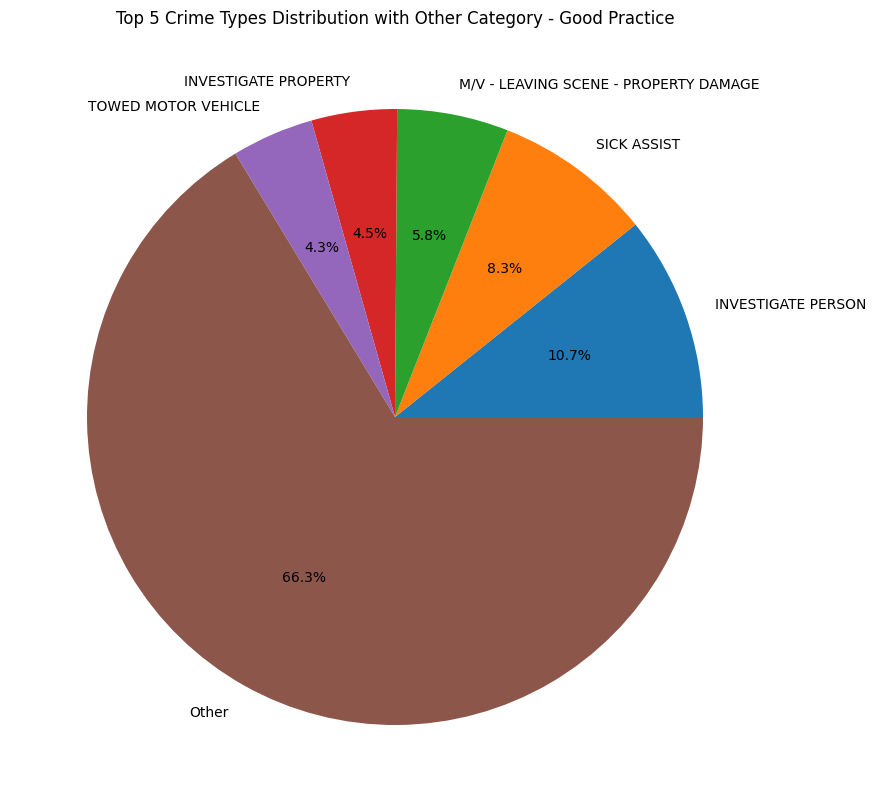

In [29]:
top_crimes = crime_counts.head(5)

other_crimes_count = crime_counts.iloc[5:].sum()

top_crimes_with_other = pd.concat([top_crimes, pd.Series([other_crimes_count], index=['Other'])])

plt.figure(figsize=(10, 10))
plt.pie(top_crimes_with_other, labels=top_crimes_with_other.index, autopct='%1.1f%%')
plt.title('Top 5 Crime Types Distribution with Other Category - Good Practice')
plt.show()


## De-cluttering your visualizations (cont.)

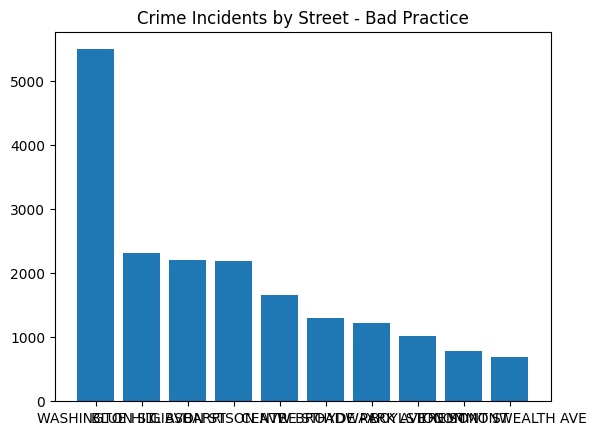

In [147]:
# Bad Practice, unreadable bar chart
plt.bar(df['STREET'].value_counts().index[:10], df['STREET'].value_counts()[:10])
plt.title('Crime Incidents by Street - Bad Practice')
plt.show()


We can face a similar issue with bar charts. If we have too many values, the graph can become cluttered and difficult to read. In this example, we have a bar chart that shows the top 10 streets with the largest number of crimes. The graph is difficult to read because there are too many values on the x-axis.

In [34]:
df['STREET'].value_counts().mean()


8.650945840891422

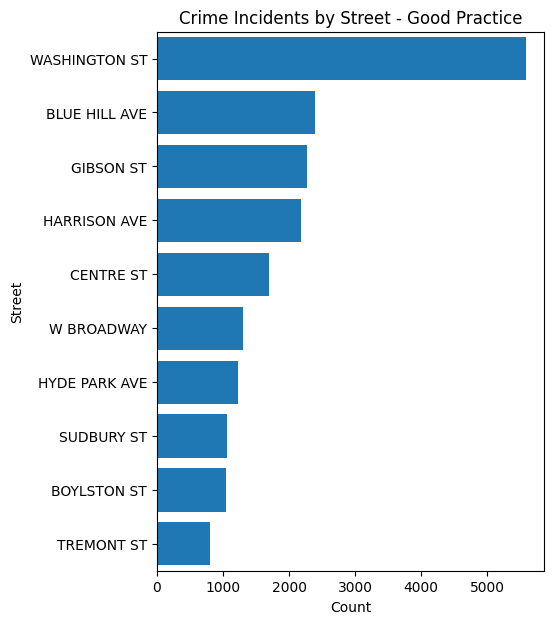

In [39]:
# Good Practice: horizontal bar, make larger figsize, adjust font size if needed
top_streets = df['STREET'].value_counts().head(10)

plt.figure(figsize=(5, 7)) # make the visualization larger

plt.barh(top_streets.index, top_streets)
plt.title('Crime Incidents by Street - Good Practice')

plt.tick_params(axis='y', labelsize=10) # adjust an axis' fontsize

plt.gca().invert_yaxis() # makes largest bar at the top

plt.margins(y=0.01)  # reduces padding at top and bottom



plt.xlabel('Count')
plt.ylabel('Street')
plt.show()


One way around this is to rotate the x-axis labels, adjust the size of the figure, and play with the font size. This makes the graph easier to read, but it is still difficult to compare the values. To fix this issue, we can sort the values in descending order. This makes it easier to see which streets have the most crimes.

## 3. Start your axis at 0

In [41]:
days_order = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}
df['DAY_ORDER'] = df['DAY_OF_WEEK'].map(days_order)

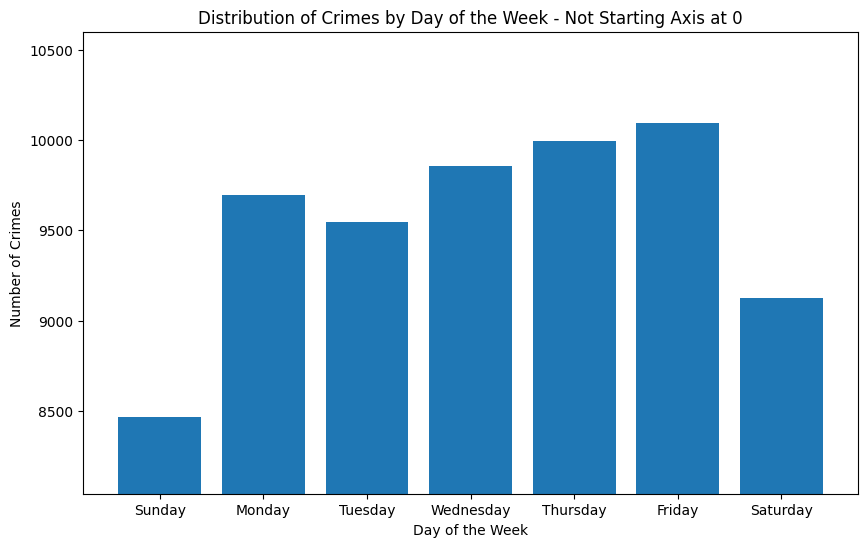

In [42]:
#bad
daily_crimes = df.groupby(['DAY_ORDER', 'DAY_OF_WEEK'])['INCIDENT_NUMBER'].count()

plt.figure(figsize=(10, 6))
plt.bar(daily_crimes.index.get_level_values('DAY_OF_WEEK'), daily_crimes)

plt.title('Distribution of Crimes by Day of the Week - Not Starting Axis at 0')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')

min_val = daily_crimes.min() - (daily_crimes.min() * 0.05)
plt.ylim(min_val)  # setting y axis to start a little below the minimum val, bad

plt.show()

Another common pitfall is starting your axis at a value other than 0. This can be misleading because it can make differences seem larger than they actually are. In this example, the graph shows number of crimes on different days of the week, and it looks like there are significantly more crimes on Friday than on Sunday. But if we look at the y-axis, we can see that the graph does not start at 0. 

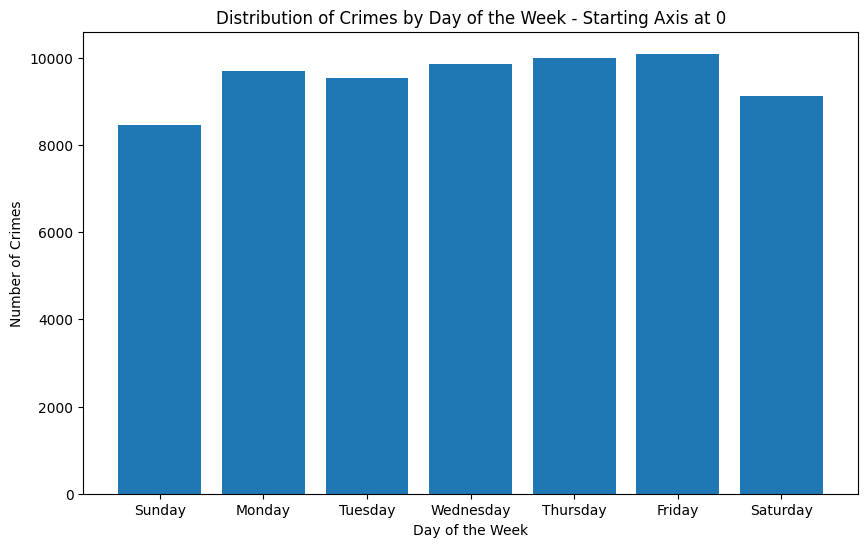

In [43]:
#good
plt.figure(figsize=(10, 6))

plt.bar(daily_crimes.index.get_level_values('DAY_OF_WEEK'), daily_crimes)
plt.title('Distribution of Crimes by Day of the Week - Starting Axis at 0')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')

plt.ylim(0)  # ensure y-axis starts at 0

plt.show()

If we adjust the y-axis to start at 0, we can see that the difference between Friday and Thursday is not as large as it seems. This is a good example of how starting your axis at a value other than 0 can be misleading.

## 4. Color Choices

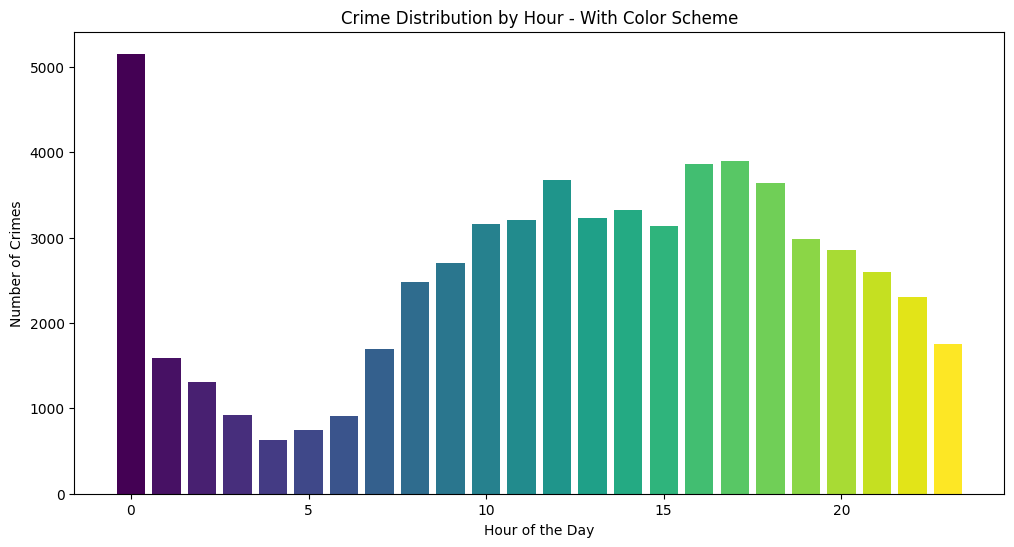

In [134]:
hourly_crimes = df.groupby('HOUR')['INCIDENT_NUMBER'].count()

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 24))  # Using a colormap for 24 hours
plt.bar(hourly_crimes.index, hourly_crimes, color=colors)
plt.title('Crime Distribution by Hour - With Color Scheme')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.show()


Matplotlib has a list of built in colormaps [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html). In this example, we have a bar chart that shows the number of crimes across the hours of the day. In this case, the colormap is not ideal because it doesn't really add any new information to the graph, it just shows the progression of increasing numbers corresponding to the hour of the day. However, a place where this colormap would be useful is in a scatter plot where the color represents a third variable, or in a heat map where the color represents the intensity of the value.


### Using colors to highlight things

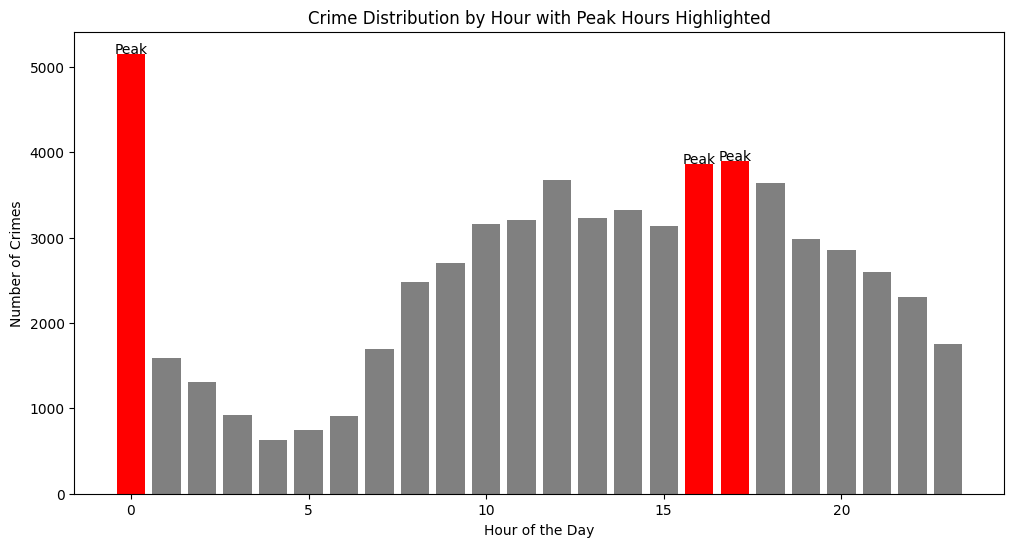

In [131]:
hourly_crimes = df.groupby('HOUR')['INCIDENT_NUMBER'].count()

# find the hours with the highest crime rates, here we look at the top 3 hours
top_hours = hourly_crimes.nlargest(3).index

plt.figure(figsize=(12, 6))

# use custom colors
colors = ['red' if hour in top_hours else 'grey' for hour in hourly_crimes.index]
plt.bar(hourly_crimes.index, hourly_crimes, color=colors)

plt.title('Crime Distribution by Hour with Peak Hours Highlighted')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')

# you can even add text
for hour in top_hours:
    plt.text(hour, hourly_crimes[hour], 'Peak', ha='center')

plt.show()

One way you can use color effectively in a bar chart is to highlight certain values. In the same example, we can use color to highlight the hours of the day that have the most crimes. This makes it easier to see that the hours with the most crimes are 0, 16, and 17.

# Know your audience, add annotations/analysis

Sometimes visualizations can speak for themselves, but other times, you can make your visualizations more accessible and easy to understand by adding annotations. By providing analysis that complements your graphics, you can make sure your audience understands the key takeaways from your visualizations.


 Additionally, by knowing who your audience is, you can create presentations and dashboards that resonate and inform effectively. For example, if you are presenting to a group of data scientists, you can use more technical terms and provide more in-depth analysis. However, if you are presenting to a group of non-technical stakeholders, you may want to use more accessible language and provide more context. 

# Conclusion

To conclude, here are some key takeaways from this tutorial:

1. Make sure your data is clean and formatted appropriately before creating visualizations
2. Label your graphs
3. De-clutter your visualizations
4. Start your axis at 0
5. Use colors effectively
6. Know your audience, add annotations/analysis